# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Importing Packages

In [1]:
# Standard operational packages
import numpy as np
import pandas as pd

# Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task 1: Load the Data

In [2]:
# reading in the data
data = pd.read_excel('Online Retail.xlsx')

## Understand the data - Inspect the data 

In [3]:
# data look-up
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# exploring number of rows and column
data.shape

(541909, 8)

In [5]:
# quick check for data-types of every column
print(data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [6]:
# descriptive stats
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# check for duplicate records
data.duplicated().sum()

5268

In [8]:
# dropping duplicates
data.drop_duplicates(keep='first',inplace=True)

In [9]:
# Deriving 'Day', 'Month' & 'Year' columns from 'InvoiceDate' column

data["InvoiceYear"] = data.InvoiceDate.dt.year
data["InvoiceMonth"] = data.InvoiceDate.dt.month_name()
data["InvoiceDay"] = data.InvoiceDate.dt.day_name()

In [10]:
#quick look-up
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,December,Wednesday
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,December,Wednesday
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,December,Wednesday
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,December,Wednesday
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,December,Wednesday


- Dataset has 541909 records, each having 8 features corresponding to sale information.
- The `InvoiceNo`, `StockCode`, `Country` and `Description` are of object datatype.
- The `Quantity` is stored are integer, `UnitPrice` and `CustomerID` as float and `InvoiceDate` as datetime object.
- There are 5268 duplicated records that are dropped for further analysis.

## Understand the data - Investigate the missing values

In [11]:
# check for null values

data.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135037
Country              0
InvoiceYear          0
InvoiceMonth         0
InvoiceDay           0
dtype: int64

In [12]:
data[data.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010,December,Wednesday
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,December,Wednesday
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,December,Wednesday
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010,December,Wednesday
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,December,Friday
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,December,Friday
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011,December,Friday
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011,December,Friday


The large amount of data contain missing information for certain variables;
- 1454 records have missing Description
- 135037 records have missing CustomerID.

But we will ignore this, as the variables who's information is missing is not of much importance in this analysis.

## Understand the data - Investigate the variables

In [13]:
# Sorting data by 'Quantity' and displaying extreme values 

data.sort_values(by='Quantity')['Quantity']

540422   -80995
61624    -74215
225530    -9600
225529    -9600
4287      -9360
          ...  
421632     4800
74614      5568
502122    12540
61619     74215
540421    80995
Name: Quantity, Length: 536641, dtype: int64

As we can see there are alot of unusual values for quantities, expecially negative values. They needs to be investigated.

In [14]:
# Sorting data by 'UnitPrice' and displaying extreme values 

data.sort_values(by='UnitPrice')['UnitPrice']

299984   -11062.06
299983   -11062.06
281615        0.00
72006         0.00
281616        0.00
            ...   
15017     13541.33
43703     16453.71
43702     16888.02
524602    17836.46
222681    38970.00
Name: UnitPrice, Length: 536641, dtype: float64

Same goes for Unit Price values, they also needs to be investigated as they can potentially skew results in analysis steps like modeling and decision making.

In [15]:
# checking the values in Country column 

data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [16]:
# Removing unwanted columns

data = data.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)

## Understand the data - Investigate the outliers

In this section, we will explore the outliers and will try to find out the reason for their unusual nature.

#### a. QUANTITY

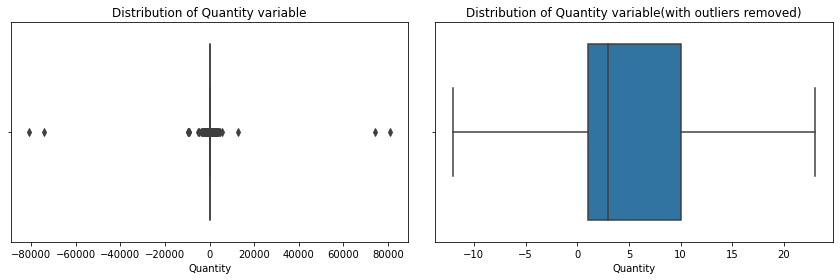

In [17]:
# plotting box plot for outlier analysis in 'Quantity' column

fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=data, 
           x='Quantity', ax=axes[0])
sns.boxplot(data=data, 
           x='Quantity', showfliers=False, ax=axes[1])

axes[0].set_title('Distribution of Quantity variable')
axes[1].set_title('Distribution of Quantity variable(with outliers removed)')

plt.tight_layout()
plt.show()

In [18]:
perc_75 = data.Quantity.quantile(0.75)
perc_25 = data.Quantity.quantile(0.25)

iqr = perc_75-perc_25

upper_limit = perc_75+(10*iqr)
lower_limit = perc_25-(10*iqr)

print(f"Upper limit for Quantity = {upper_limit}")
print(f"Lower limit for Quantity = {lower_limit}")

Upper limit for Quantity = 100.0
Lower limit for Quantity = -89.0


In [19]:
# Exploring the reason for quantities recorded as 0.

data[data.Quantity==0]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay


In [20]:
# Exploring the quantities recorded as negative.

data[data.Quantity<=0]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
141,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,2010,December,Wednesday
154,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom,2010,December,Wednesday
235,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom,2010,December,Wednesday
236,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,2010,December,Wednesday
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,2010,December,Wednesday
...,...,...,...,...,...,...,...,...
540449,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom,2011,December,Friday
541541,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom,2011,December,Friday
541715,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom,2011,December,Friday
541716,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom,2011,December,Friday


In [21]:
# Quantities recorded as negative can be attributed to Discount in Sales?

data[(data.Quantity<=0)&(data.Description=='Discount')]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
141,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,2010,December,Wednesday
9038,Discount,-1,2010-12-05 13:21:00,29.29,United Kingdom,2010,December,Sunday
14498,Discount,-1,2010-12-07 12:34:00,281.00,United Kingdom,2010,December,Tuesday
19392,Discount,-1,2010-12-08 16:00:00,267.12,United Kingdom,2010,December,Wednesday
31134,Discount,-1,2010-12-15 09:14:00,5.76,United Kingdom,2010,December,Wednesday
...,...,...,...,...,...,...,...,...
479868,Discount,-1,2011-11-18 12:06:00,19.82,United Kingdom,2011,November,Friday
479869,Discount,-1,2011-11-18 12:06:00,16.76,United Kingdom,2011,November,Friday
493613,Discount,-1,2011-11-23 12:29:00,26.33,Italy,2011,November,Wednesday
516221,Discount,-1,2011-11-30 17:34:00,20.53,United Kingdom,2011,November,Wednesday


According to analysis, we can conclude that:
- Negative quantity might be entered upon items' return.
- Discounts are recorded with -1 quantity.
- We can consider them as data entry error by the cashier/operator, as unit prices are valid.

In [22]:
# Outliers in Quantity column in positive extremes

data[data.Quantity>upper_limit]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
96,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,United Kingdom,2010,December,Wednesday
178,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,United Kingdom,2010,December,Wednesday
179,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,United Kingdom,2010,December,Wednesday
180,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,United Kingdom,2010,December,Wednesday
181,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,United Kingdom,2010,December,Wednesday
...,...,...,...,...,...,...,...,...
540442,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,United Kingdom,2011,December,Friday
541286,CHARLOTTE BAG SUKI DESIGN,110,2011-12-09 10:23:00,2.46,United Kingdom,2011,December,Friday
541545,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,United Kingdom,2011,December,Friday
541702,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,United Kingdom,2011,December,Friday


In [23]:
# Exploring quantites with unusual very high values

data[data.Quantity>5000]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
61619,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,2011,January,Tuesday
74614,NaN,5568,2011-01-28 12:03:00,0.00,United Kingdom,2011,January,Friday
502122,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,United Kingdom,2011,November,Friday
540421,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,United Kingdom,2011,December,Friday


Extremely high order quantity is valid, as it might contain some minor item.

#### b. UNIT PRICE

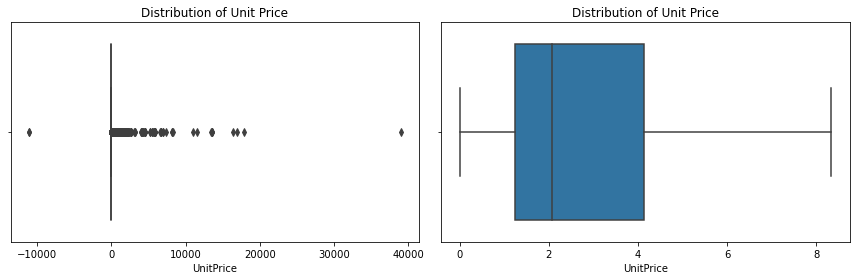

In [24]:
# plotting box plot for outlier analysis in 'UnitPrice' column

fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=data, 
           x='UnitPrice', ax=axes[0])
sns.boxplot(data=data, 
           x='UnitPrice', showfliers=False, ax=axes[1])

axes[0].set_title('Distribution of Unit Price')
axes[1].set_title('Distribution of Unit Price')

plt.tight_layout()
plt.show()

In [25]:
# IQR and Upper and Lower limit calculation

perc_75 = data.UnitPrice.quantile(0.75)
perc_25 = data.UnitPrice.quantile(0.25)

iqr = perc_75-perc_25

upper_limit = perc_75+(6*iqr)
lower_limit = perc_25-(6*iqr)

print(f"Upper limit for UnitPrice = {upper_limit}")
print(f"Lower limit for UnitPrice= {lower_limit}")

Upper limit for UnitPrice = 21.41
Lower limit for UnitPrice= -16.03


In [26]:
# Exploring data with unit price recorded as negative

data[data.UnitPrice<0]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
299983,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom,2011,August,Friday
299984,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom,2011,August,Friday


In [27]:
# Data with unit price recorded as 0

data[data.UnitPrice==0].dropna().head(10)

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
6391,amazon,20,2010-12-03 12:08:00,0.0,United Kingdom,2010,December,Friday
6392,amazon,15,2010-12-03 12:08:00,0.0,United Kingdom,2010,December,Friday
7313,?,-30,2010-12-03 16:50:00,0.0,United Kingdom,2010,December,Friday
9302,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,Germany,2010,December,Sunday
13217,check,-20,2010-12-06 15:35:00,0.0,United Kingdom,2010,December,Monday
13218,check,-35,2010-12-06 15:36:00,0.0,United Kingdom,2010,December,Monday
13264,damages,-43,2010-12-06 16:10:00,0.0,United Kingdom,2010,December,Monday
14335,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,United Kingdom,2010,December,Tuesday
14336,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,United Kingdom,2010,December,Tuesday
14337,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,United Kingdom,2010,December,Tuesday


In [28]:
# exploring data for unit price outside normal range

data[data.UnitPrice>upper_limit]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
141,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,2010,December,Wednesday
246,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,United Kingdom,2010,December,Wednesday
294,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,United Kingdom,2010,December,Wednesday
431,IVORY EMBROIDERED QUILT,2,2010-12-01 11:33:00,35.75,United Kingdom,2010,December,Wednesday
1423,CARRIAGE,1,2010-12-01 14:05:00,50.00,EIRE,2010,December,Wednesday
...,...,...,...,...,...,...,...,...
541433,WHEELBARROW FOR CHILDREN,1,2011-12-09 10:26:00,24.96,United Kingdom,2011,December,Friday
541459,3 TIER CAKE TIN RED AND CREAM,1,2011-12-09 10:26:00,29.17,United Kingdom,2011,December,Friday
541527,SET OF 16 VINTAGE BLACK CUTLERY,1,2011-12-09 10:26:00,24.96,United Kingdom,2011,December,Friday
541540,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,United Kingdom,2011,December,Friday


In [29]:
# data with extremely high unit prices

data[data.UnitPrice>5000]

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
15016,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,United Kingdom,2010,December,Tuesday
15017,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,United Kingdom,2010,December,Tuesday
16232,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,United Kingdom,2010,December,Tuesday
16313,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,United Kingdom,2010,December,Tuesday
16356,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,United Kingdom,2010,December,Tuesday
16357,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,United Kingdom,2010,December,Tuesday
43702,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,United Kingdom,2011,January,Wednesday
43703,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,United Kingdom,2011,January,Wednesday
96844,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,United Kingdom,2011,February,Monday
96845,AMAZON FEE,-1,2011-02-21 15:11:00,5258.77,United Kingdom,2011,February,Monday


We can conclude our analysis for unusual Unit Price values as:
- Negative Prices are recorded as adjustments of bad debts.
- Extremely high Prices majorly corresponds to fees or debts, like Amazon, Postage etc.
- Prices recorded as zero can be result of various causes;
    - Data entry error.
    - Damaged items being discarded from inventory, with negative Quantity entered.
    - Stock Quantity adjustments.
    - etc.

#### c. Further Investigating Unusual records

In [30]:
unusual_entries = data[(data.Quantity<=0)&(data.UnitPrice==0)].dropna()
unusual_entries.head(4)

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay
7313,?,-30,2010-12-03 16:50:00,0.0,United Kingdom,2010,December,Friday
13217,check,-20,2010-12-06 15:35:00,0.0,United Kingdom,2010,December,Monday
13218,check,-35,2010-12-06 15:36:00,0.0,United Kingdom,2010,December,Monday
13264,damages,-43,2010-12-06 16:10:00,0.0,United Kingdom,2010,December,Monday


In [31]:
unusual_entries.Description.value_counts().head(20)

check                     120
damages                    45
damaged                    42
?                          41
sold as set on dotcom      20
Damaged                    14
thrown away                 9
Unsaleable, destroyed.      9
??                          7
damages?                    5
ebay                        5
wet damaged                 5
smashed                     4
missing                     3
wet pallet                  3
CHECK                       3
sold as 1                   2
counted                     2
???missing                  2
rusty throw away            2
Name: Description, dtype: int64

Analysing the entries where quantities and unit price both listed as either zero and negative yeilds that these entries are the inventory adjustments in one way or other.
- These are majorly marked as `check`, which might be inventory testing or quality ensuring checks.
- Second major category of these unusual entries is damaged items.
- Some of them are adjustments, corresponds to missing items, wasted, dusty or unsaleable items.

## Additional Pre-processing

In [32]:
# Revenue per sale

data["Total Amount"] = data.Quantity * data.UnitPrice

In [33]:
# quick data look-up

data.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay,Total Amount
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,December,Wednesday,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,December,Wednesday,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,December,Wednesday,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,December,Wednesday,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,December,Wednesday,20.34
5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,2010,December,Wednesday,15.30
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,2010,December,Wednesday,25.50
7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,United Kingdom,2010,December,Wednesday,11.10
8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,United Kingdom,2010,December,Wednesday,11.10
9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom,2010,December,Wednesday,54.08


# Exploratory Data Analysis

## a. MONTHLY SALES

In [34]:
# Calculating sales for each month

total_sales_by_month = data.InvoiceMonth.value_counts()
total_sales_by_month

November     83343
December     67227
October      59969
September    49861
July         39267
May          36782
June         36609
March        36439
August       35064
January      34900
April        29701
February     27479
Name: InvoiceMonth, dtype: int64

In [35]:
# Ordering w.r.t month order for plotting

months_list = ["January", "February", "March", "April", "May",
               "June", "July", "August", "September", "October",
               "November", "December"]

total_sales_by_month = total_sales_by_month.reindex(index=months_list)

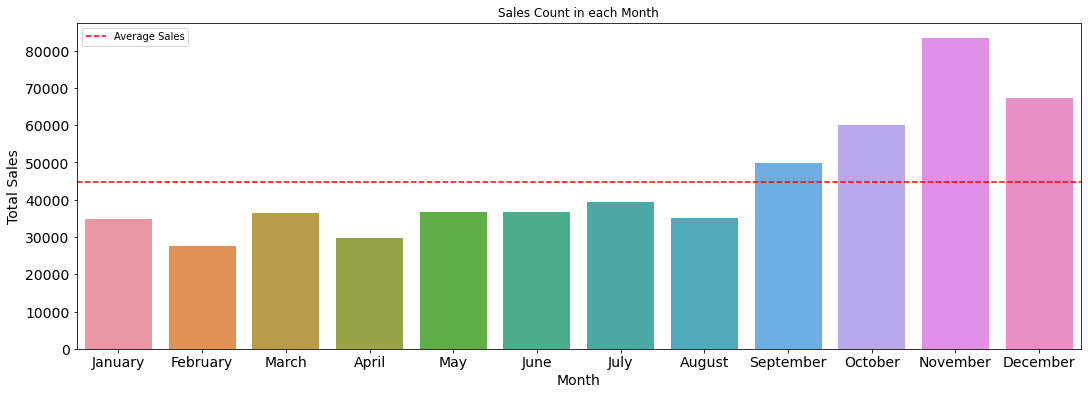

In [36]:
# Plotting Sales count for each month

plt.figure(figsize=(18,6))

sns.barplot(x= total_sales_by_month.index,
           y= total_sales_by_month)
plt.axhline(y=total_sales_by_month.mean(), color='red', linestyle='dashed', label='Average Sales')

plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.legend()
plt.title("Sales Count in each Month")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- The average monthly sales are approx. 44720
- Novemeber is clearly the most busiest month for the store, it might be due to the End year Sale that bussiness offer in November.
- The lowest number of sales are recorded to be in February.

## b. DAILY SALES

In [37]:
# Calculating sales for each weekday

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

total_sales_by_weekdays = data.InvoiceDay.value_counts()
total_sales_by_weekdays = total_sales_by_weekdays.reindex(index= days_of_week)
total_sales_by_weekdays

Monday        94435.0
Tuesday      101064.0
Wednesday     93715.0
Thursday     103056.0
Friday        81565.0
Saturday          NaN
Sunday        62806.0
Name: InvoiceDay, dtype: float64

In [38]:
# check for the reason of 'Nan' against Saturday

data.InvoiceDay.value_counts()

Thursday     103056
Tuesday      101064
Monday        94435
Wednesday     93715
Friday        81565
Sunday        62806
Name: InvoiceDay, dtype: int64

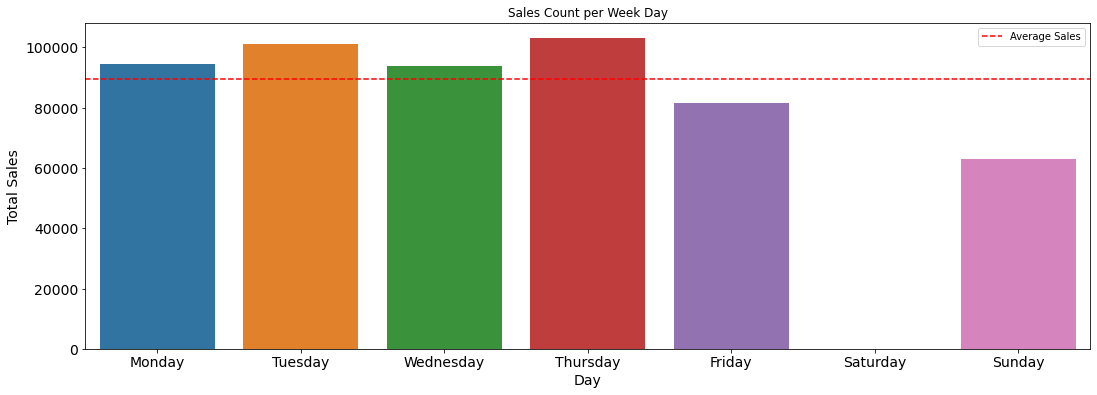

In [39]:
# Plotting sales count for each weekday in a bar chart

plt.figure(figsize=(18,6))

sns.barplot(x= total_sales_by_weekdays.index,
           y= total_sales_by_weekdays)
plt.axhline(y=total_sales_by_weekdays.mean(), color='red', linestyle='dashed', label='Average Sales')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.legend()
plt.title("Sales Count per Week Day")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Weekly average sales are around ~89440
- Thursdays and Tuesdays are the busiest day for the store.
- Saturday seems to be a holiday.
- Sunday seems to have lowest sales on average.

## c. MONTHLY REVENUE

In [40]:
# Calculating revenue for each month

monthly_revenue = data.groupby('InvoiceMonth').sum()['Total Amount'].reset_index().rename(
    {"InvoiceMonth":"Month","Total Amount":"Revenue"},
    axis=1)
monthly_revenue

,Month,Revenue
0,April,492367.841
1,August,681386.460
2,December,1179424.670
3,February,497026.410
4,January,558448.560
5,July,680156.991
6,June,689977.230
7,March,682013.980
8,May,722094.100
9,November,1456145.800


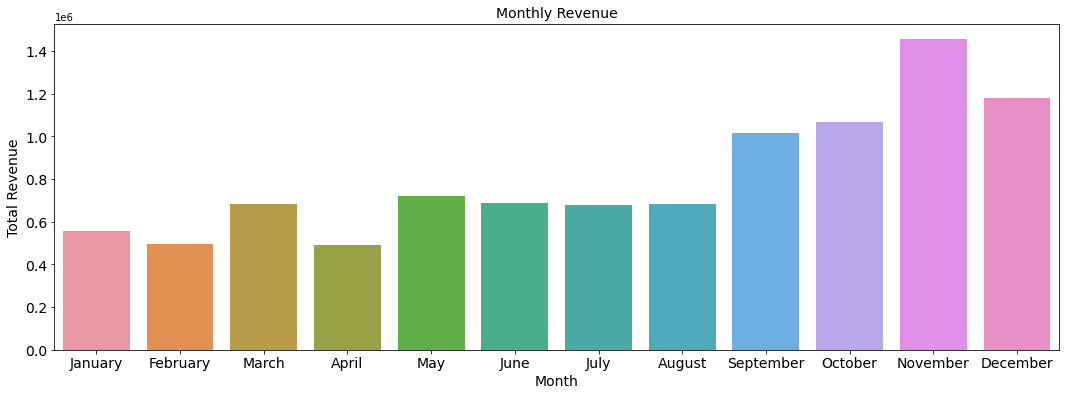

In [41]:
# plotting monthly revenue in a bar-plot

plt.figure(figsize=(18,6))

sns.barplot(data= monthly_revenue,
            x= 'Month',
            y= 'Revenue',
            order= months_list)

plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.title("Monthly Revenue", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Maximum revenue is generated in the month of Novemeber, which is also the most busy time of year in terms of sales.

On the other hand, February and April yields the lowest total revenue.

## d. DAILY REVENUE

In [42]:
# Calculating daily revenue for the store

daily_revenue = data.groupby('InvoiceDay').sum()['Total Amount'].reset_index().rename(
    {"InvoiceDay":"Day","Total Amount":"Revenue"},
    axis=1)
daily_revenue

,Day,Revenue
0,Friday,1537958.621
1,Monday,1584895.301
2,Sunday,798659.461
3,Thursday,2108701.530
4,Tuesday,1965703.611
5,Wednesday,1730088.430


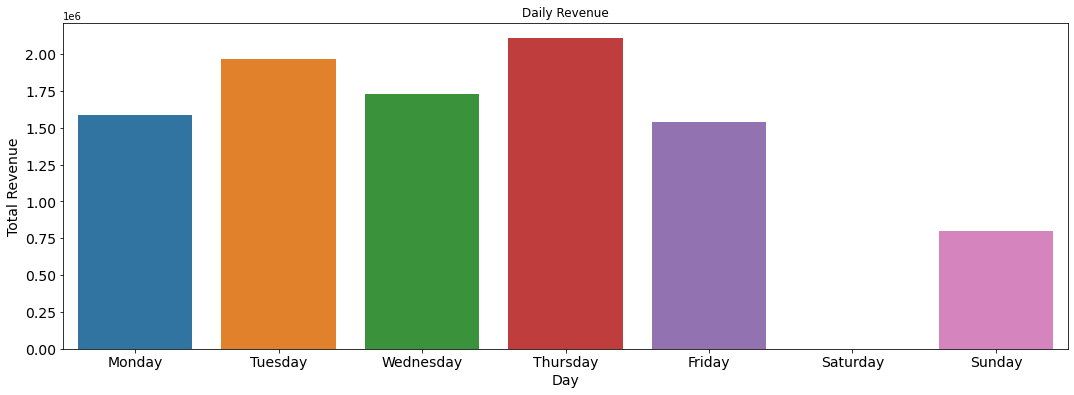

In [43]:
# plotting daily revenue against each weekday in a bar-plot

plt.figure(figsize=(18,6))

sns.barplot(data= daily_revenue,
            x= 'Day',
            y= 'Revenue',
            order= days_of_week)

plt.xlabel("Day", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.title("Daily Revenue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

With Thursday being the most busy day in terms of sales, yeilds the most revenue for the store.

## e. BEST SELLING PRODUCT

In [44]:
# Extracting the top selling product interms of quantity

top_selling_products = data.sort_values(by='Quantity', ascending=False).dropna().head(10)

In [45]:
top_selling_products.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceYear,InvoiceMonth,InvoiceDay,Total Amount
540421,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,United Kingdom,2011,December,Friday,168469.60
61619,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,2011,January,Tuesday,77183.60
502122,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,United Kingdom,2011,November,Friday,0.00
421632,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,United Kingdom,2011,October,Thursday,1008.00
206121,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,United Kingdom,2011,May,Friday,3096.00
220843,?,4000,2011-06-09 15:04:00,0.00,United Kingdom,2011,June,Thursday,0.00
97432,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,United Kingdom,2011,February,Tuesday,3202.92
270885,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,United Kingdom,2011,July,Tuesday,191.16
160546,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,United Kingdom,2011,April,Monday,6539.40
52711,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,United Kingdom,2011,January,Tuesday,6539.40


In [46]:
# Removing items from top selling products with unusual description

top_selling_products = top_selling_products[~(top_selling_products.Description=='?')]

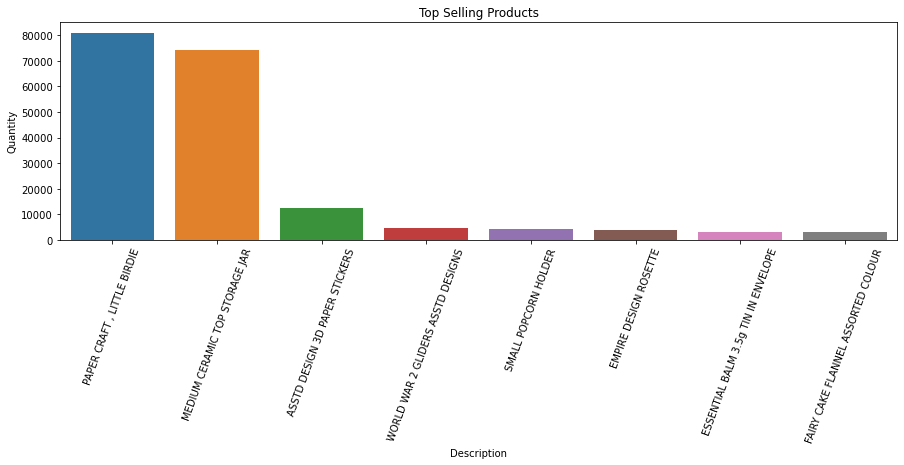

In [47]:
# plotting top selling products in a bar chart along-with product description

plt.figure(figsize=(15,4))

sns.barplot(data=top_selling_products,
        x='Description',
        y='Quantity')

plt.title('Top Selling Products')
plt.xticks(rotation=70)
plt.show()

The top selling product of the store is `PAPER CRAFT, LITTLE BIRDIE` followed by `MEDIUM CERAMIC TOP STORAGE JAR` and `ASSTD DESIGN 3D PAPER STICKERS`.

## f. TOP CONSUMER COUNTRIES

### + with respect to Sales

In [48]:
# consumer region w.r.t to largest total sales

total_sales_by_countries = data.Country.value_counts().reset_index().rename(
    {'index':'Country','Country':'Total Sales'},
    axis=1)
total_sales_by_countries.head(5)

,Country,Total Sales
0,United Kingdom,490300
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528


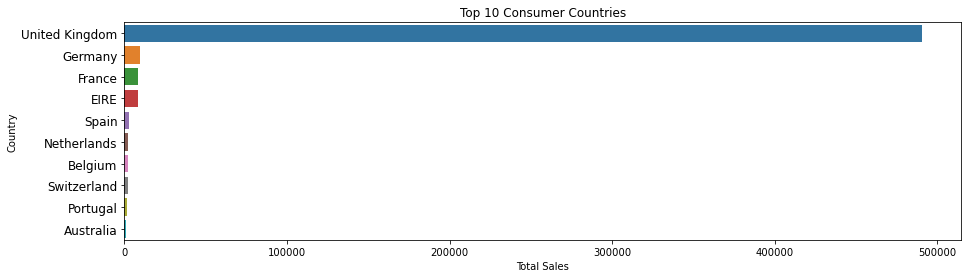

In [49]:
# Plotting top-consumer countries w.r.t sales

plt.figure(figsize=(15,4))

sns.barplot(data=total_sales_by_countries.head(10),
            y='Country',
            x='Total Sales')

plt.title('Top 10 Consumer Countries')
plt.yticks(fontsize=12)
plt.show()

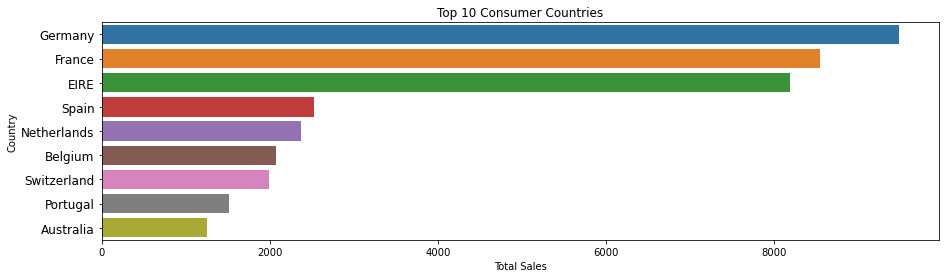

In [50]:
# Zooming on the successive consumers by removing UK from graph for better visual

plt.figure(figsize=(15,4))

sns.barplot(data=total_sales_by_countries[1:10],
            y='Country',
            x='Total Sales')

plt.title('Top 10 Consumer Countries')
plt.yticks(fontsize=12)
plt.show()

#### + with respect to Quantities Sold

In [51]:
# consumer region w.r.t to largest number of quantities sold to

top_consumers_wrt_qts_sold = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
top_consumers_wrt_qts_sold.head(5)

,Country,Quantity
0,United Kingdom,4250328
1,Netherlands,200128
2,EIRE,142495
3,Germany,117341
4,France,110438


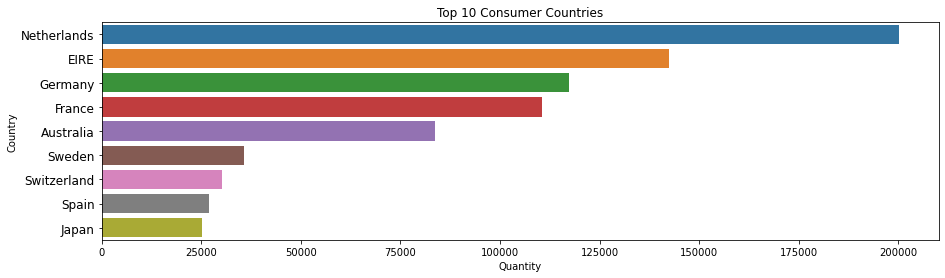

In [52]:
# plotting results except for UK(for better visuals)

plt.figure(figsize=(15,4))

sns.barplot(data=top_consumers_wrt_qts_sold[1:10],
            y='Country',
            x='Quantity')

plt.title('Top 10 Consumer Countries')
plt.yticks(fontsize=12)
plt.show()

#### + with respect to Revenue generated

In [53]:
# Top countries that gives high revenue

top_consumers_wrt_revenue = data.groupby('Country')['Total Amount'].sum().sort_values(ascending=False).reset_index()
top_consumers_wrt_revenue.head(5)

,Country,Total Amount
0,United Kingdom,8.167128e+06
1,Netherlands,2.846615e+05
2,EIRE,2.629934e+05
3,Germany,2.215095e+05
4,France,1.973171e+05


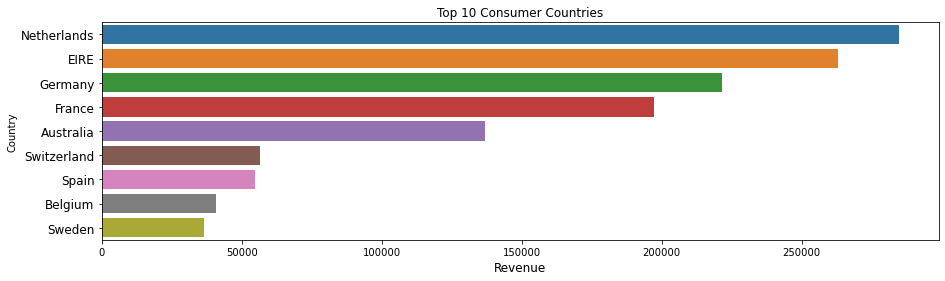

In [54]:
# plotting results for high revenue generated countries; except for UK(for better visual)

plt.figure(figsize=(15,4))

sns.barplot(data=top_consumers_wrt_revenue[1:10],
            y='Country',
            x='Total Amount')

plt.xlabel('Revenue', fontsize=12)
plt.title('Top 10 Consumer Countries')
plt.yticks(fontsize=12)
plt.show()

- United Kingdom gives highest revenue, and have largest number of sales because of it being home country.

- United Kingdom with largest consumer base is followed by `Germany`, `France` and `EIRE`. 

# CONCLUSION:

Based on the data analysis, several important insights about the online retail business is uncovered as listed below:

1. **Data Quality**: 
    The initial dataset contained 541,909 records with 8 features. 5268 duplicated records are identified and removed to ensure data accuracy.


2. **Missing Data**: 
    The variables, like `Description` and `CustomerID`; have missing information. However, these missing values are not taken into account for the current analysis because of their little to no impact.


3. **Unusual Values**: 
    A major subset of unusual values in both `Quantity` and `UnitPrice` was observed, including negative quantities and extreme prices. These anomalies were attributed to 
    - Item returns
    - Discounts
    - Data entry errors
    - Valid transactions in the case of extremely high order quantities.


4. **Inventory Adjustments**: 
    Entries found with zero or negative quantities and unit prices were found to be either one of them
    - Inventory Adjustments
    - Inventory Checks
    - Damaged Items
    - Missing items
    - Unsaleable items
    - and many other related causes.


5. **Total Amount Calculation**: 
    `Total Amount` is calculated by multiplying the `Quantity` and `UnitPrice`, serving as total revenue of the Sale.


6. **Sales Trends**: 
    November emerged as the busiest month for the store, likely due to year-end sales promotions that business offer (End Novemeber Sale or 11/11 etc.). February had the lowest number of sales.


7. **Busiest Days**: 
    Thursdays and Tuesdays were the busiest days, while Saturdays appeared to be a holiday, and Sundays had the lowest sales on average.


8. **Revenue Generation**: 
    Thursday, being the busiest day, also yielded the highest revenue for the store.


9. **Monthly Revenue**: 
    The store generated the maximum revenue in November, correlating with the busiest sales month. In contrast, February and April had the lowest total revenue.


10. **Top-Selling Products**: 
    The top-selling products are 
    - PAPER CRAFT, LITTLE BIRDIE
    - MEDIUM CERAMIC TOP STORAGE JAR
    - ASSTD DESIGN 3D PAPER STICKERS


11. **Customer Base**: 
    The United Kingdom had the largest consumer base, followed by Germany, France, and EIRE.

## Recommendations to Stakeholders:

1. **Quality Assurance**: 
    Implement stricter quality assurance measures to reduce data entry errors, and have seperate and well-managed profiles for account adjustments.


2. **Inventory Management**: 
    Improved inventory management practices be deployed to reduce the need for adjustments related to damaged, missing, or unsaleable items.


3. **Marketing Strategies**: 
    - Ensure that the business is properly equipped to handle the increase in the traffic in November & December, which include the availability of customer service support and maintaining the seamless functionality of the website etc.
    - Capitalize on the popularity of November by planning special promotions and sales events during this month. 
    - Investigate the reasons behind the lower sales in February and consider strategies to boost sales during that period.


4. **Weekday Focus**: Given that Thursdays and Tuesdays are the busiest days, consider tailoring marketing efforts and promotions to these days to further maximize revenue.


5. **Product Optimisation**: Continue to stock and promote top-selling products like "PAPER CRAFT, LITTLE BIRDIE" and consider expanding product lines related to such top-selling items.


6. **International Expansion**: Explore opportunities to expand the customer base in countries other than the UK. This can be achieved by marketing and promotions for specific region.